In [64]:
#Performing standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds = pd.read_csv('Mall_Customers.csv')

In [65]:
ds.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


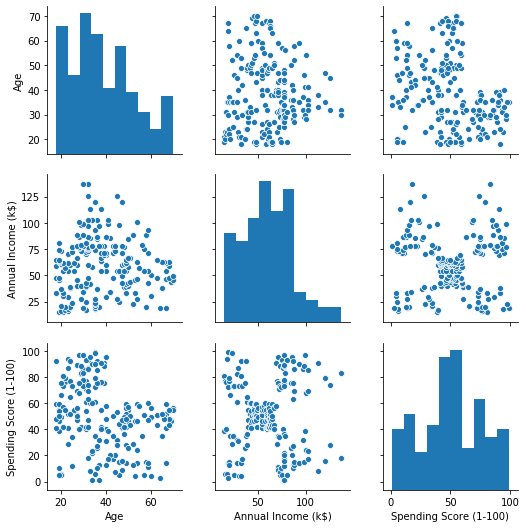

In [7]:
sns.pairplot(ds[['Age','Annual Income (k$)','Spending Score (1-100)']])

In [9]:

X = ds[['Annual Income (k$)','Spending Score (1-100)']].values

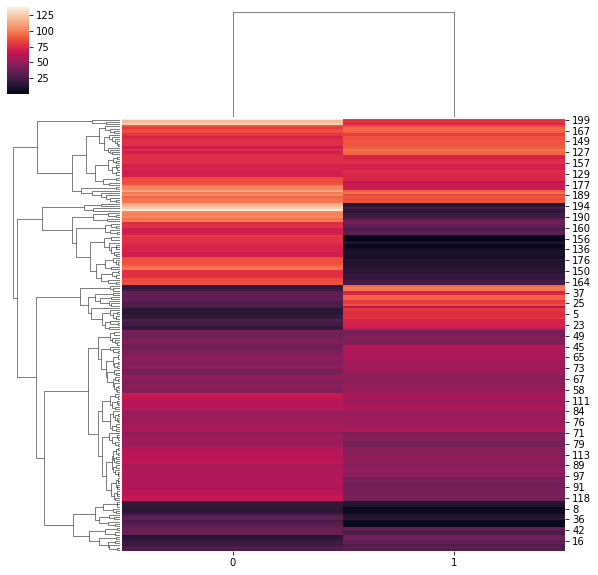

In [10]:
sns.clustermap(X)

In [25]:
# Using dandogram to find the optimal number of cluster
from scipy.cluster.hierarchy import dendrogram,linkage

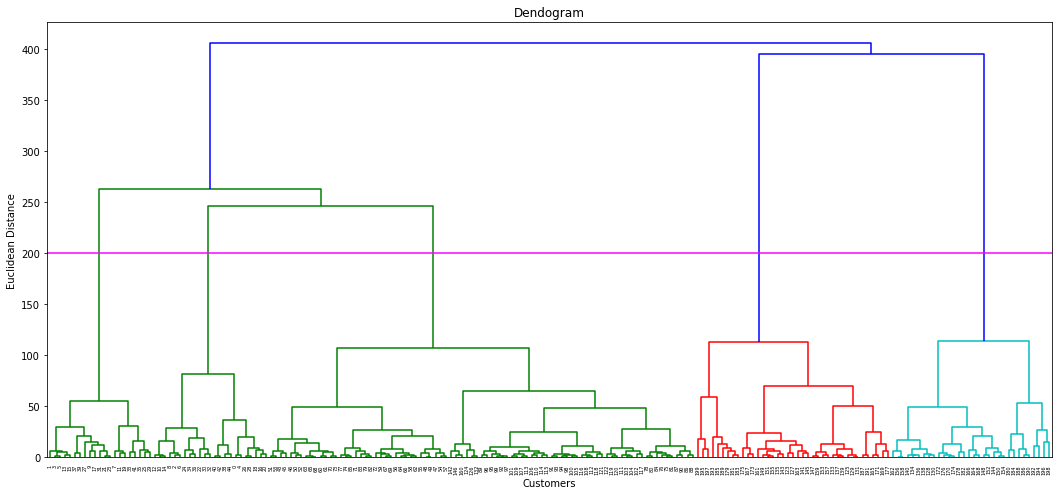

In [45]:
plt.figure(figsize=(18,8))
digram = dendrogram(linkage(X,method='ward', metric='euclidean'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.plot([0,100,1000,5000],[200,200,200,200],color='magenta')

#### Conclusion : No of clusters should be 5.

In [46]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

In [55]:
cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_cluster = cluster.fit_predict(X)

In [63]:
cluster.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

Text(0.5, 1.0, 'Hierarchical Clustering')

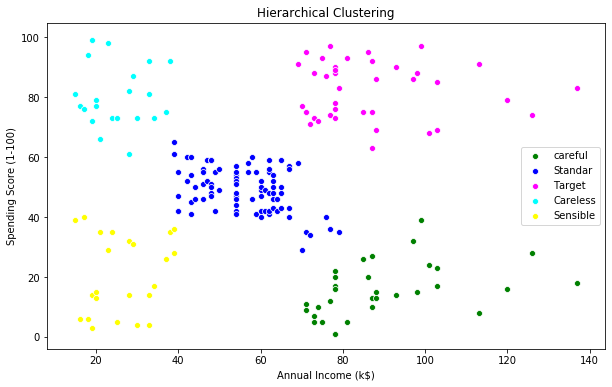

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(X[y_cluster == 0,0],X[y_cluster == 0,1],color='green',label='careful')
sns.scatterplot(X[y_cluster == 1,0],X[y_cluster == 1,1],color='blue',label='Standar')
sns.scatterplot(X[y_cluster == 2,0],X[y_cluster == 2,1],color='magenta',label='Target')
sns.scatterplot(X[y_cluster == 3,0],X[y_cluster == 3,1],color='cyan',label='Careless')
sns.scatterplot(X[y_cluster == 4,0],X[y_cluster == 4,1],color='yellow',label='Sensible')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchical Clustering')